# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset consists of 1500 rows and 8 columns. I performed data cleaning by addressing the missing values according to the dataset table and validating the columns based on the specified criteria.

- booking_id : Data is as described without missing values.
- months_as_member : Data is as described without missing values.
- weight : There were 20 missing values, so I replaced them with the average of the weights.
- days_before : Had no missing values but it was of an object type. I noticed some entries were of the format ' 12 days', which I removed and then converted it to integer type.
- day_of_week : Initially had 10 unique values. I replaced to wrongly entered day format (e.g Wednesday) to the required format (Wed).
- time : Data is as described without missing values.
- category : Contained 13 "-" values, which I considered as missing values and replaced them with "unknown"
- attended: Data is as described without missing values. Contained only 0 and 1.



In [25]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#import data
fit_df = pd.read_csv('fitness_class_2212.csv')
fit_df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [26]:
#check info dataset
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [27]:
# desription of data
fit_df.describe(include='all')

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
count,1500.000000,1500.000000,1480.000000,1500,1500,1500,1500,1500.000000
unique,NaN,NaN,NaN,31,10,2,6,NaN
top,NaN,NaN,NaN,10,Fri,AM,HIIT,NaN
freq,NaN,NaN,NaN,293,279,1141,667,NaN
mean,750.500000,15.628667,82.610378,NaN,NaN,NaN,NaN,0.302667
std,433.157015,12.926543,12.765859,NaN,NaN,NaN,NaN,0.459565
min,1.000000,1.000000,55.410000,NaN,NaN,NaN,NaN,0.000000
25%,375.750000,8.000000,73.490000,NaN,NaN,NaN,NaN,0.000000
50%,750.500000,12.000000,80.760000,NaN,NaN,NaN,NaN,0.000000
75%,1125.250000,19.000000,89.520000,NaN,NaN,NaN,NaN,1.000000


In [28]:
#check for missing values
fit_df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [29]:
#filled missing values for weight
fit_df['weight'].fillna(fit_df['weight'].mean(), inplace=True)

In [30]:
#clean 'days' from the column
fit_df['days_before'] = fit_df['days_before'].apply(lambda x: x.strip()[0] if 'days' in x else x)

#change type to int
fit_df['days_before'] = fit_df['days_before'].astype('int')

In [31]:
#checking the for incorrect days of the week
fit_df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [32]:
#replaced wrong day_of_the_week format
replacements = {'Wednesday': 'Wed', 'Fri.':'Fri', 'Monday':'Mon'}
for word, replacement in replacements.items():
    fit_df['day_of_week'] = fit_df['day_of_week'].str.replace(word, replacement)

In [33]:
#inspect the values of category
fit_df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [34]:
#replace wrong values
fit_df['category'] = fit_df['category'].str.replace('-', 'unknown')

In [35]:
#inspect values of attended
fit_df['attended'].unique()

array([0, 1])

## Task 2
**Figure 1 - Attendance Count** shows that the majority of members did not attend the class (0), outnumbering those who did (1). The count of non-attendees is approximately two times higher than the count of attendees.

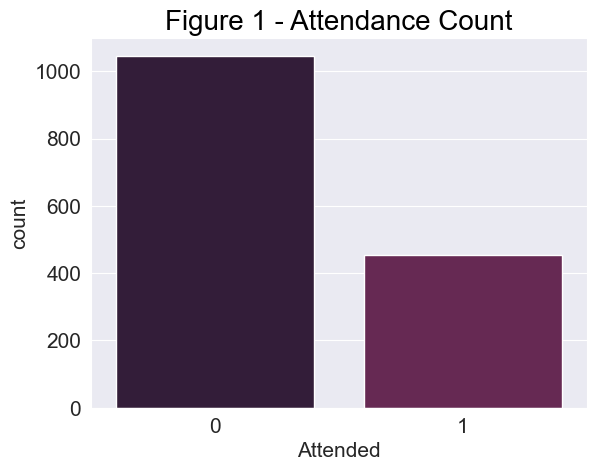

In [36]:
# countplot of attended variable
plt.rcParams.update({'font.size': 15})
sns.set_style('darkgrid')
sns.set_palette('rocket')
#plt.figure(figsize=(8,6))
sns.countplot(data=fit_df, x='attended')
plt.title('Figure 1 - Attendance Count', fontsize=20,
          color="black")
plt.xlabel('Attended')
plt.show()

## Task 3
**Figure 2.1 - Distribution of Months as a Member**, shows a right skewed distribution of `months_as_memeber`. The majority of memberships fall within the 0 to 20 months range, but there are a few outlier memberships that exceed 90 months. To address the skewed distribution, I utilized a log transformation on the data. As shown in **Figure 2.2 - Distribution of Months as a Member (Log Transform)**, the distribution now appears closer to a normal distribution.

<AxesSubplot: title={'center': 'Figure 2.1 - Distribution of Months as a Member'}, xlabel='months_as_member', ylabel='Count'>

<Figure size 800x600 with 0 Axes>

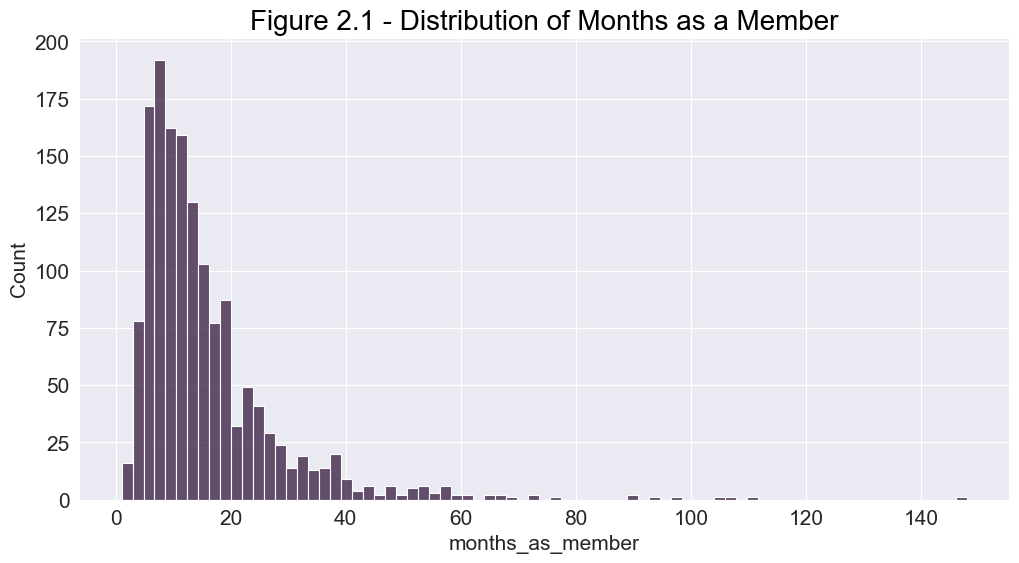

In [37]:
# distribution of months_as_member
sns.set_style('darkgrid')
sns.set_palette('rocket')
plt.figure(figsize=(8,6))
plt.figure(figsize=(12,6))
plt.title('Figure 2.1 - Distribution of Months as a Member', fontsize=20,
          color="black")
sns.histplot(data=fit_df, x='months_as_member')

<Figure size 800x600 with 0 Axes>

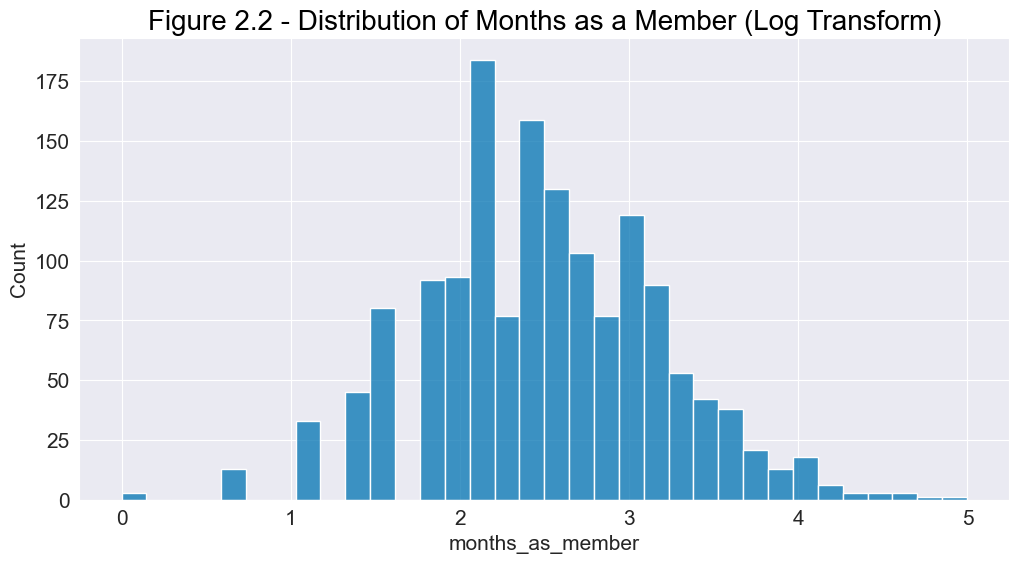

In [38]:
#log transformation of month as member
sns.set_style('darkgrid')
sns.set_palette('colorblind')
plt.figure(figsize=(8,6))
plt.figure(figsize=(12,6))
sns.histplot(data=fit_df, x=np.log(fit_df['months_as_member']))
plt.title('Figure 2.2 - Distribution of Months as a Member (Log Transform)', fontsize=20,
          color="black")
plt.show()

## Task 4

From **Figure 3 - Boxplot of Attendance and Months as a Member**

Members who attended the classes have a higher median value of `month_as_member` compared to those who didn't attend. Additionally, the interquartile range (IQR) of the attendance group is roughly two times larger than that of the non-attendance group. We can say that members who attend classes tend to have longer membership durations.

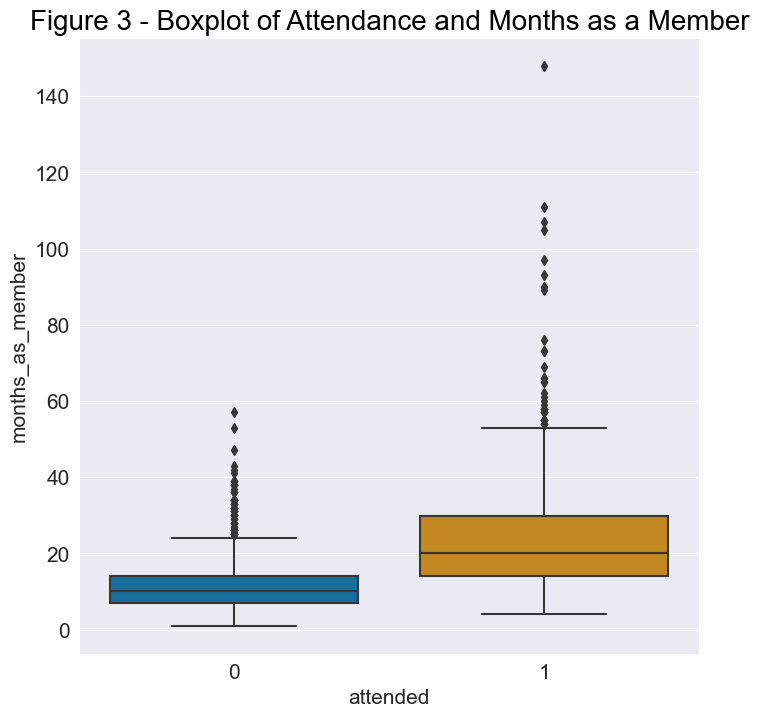

In [39]:
#box plot to see distribution difference

plt.figure(figsize=(8, 8))
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.boxplot(data=fit_df, x='attended', y='months_as_member')
plt.title('Figure 3 - Boxplot of Attendance and Months as a Member', fontsize=20,
          color="black")
plt.show()

In [40]:
#distribution by attendance
fit_df.groupby('attended')['months_as_member'].describe()

,count,mean,std,min,25%,50%,75%,max
attended,,,,,,,,
0,1046.0,11.495220,7.171546,1.0,7.0,10.0,14.00,57.0
1,454.0,25.151982,17.433856,4.0,14.0,20.0,29.75,148.0


### Preprocessing Steps
I have taken the following preprocessing steps to train the model:
- remove the booking id column because it contains unique values that won't be useful to the model.
- convert categorical columns to numeric by encoding
- scale the data to reduce  influence of different scales on the model
- check the correlation between variables
- remove the outlier around 140 in `months_as_member`
- remove 2 outliers above 140 in `weight`

In [41]:
# drop booking id
fit_df.drop(columns='booking_id', axis=1, inplace=True)

#remove outliers in weight and months_as_memeber column
fit_df = fit_df[ (fit_df['weight'] < 140) & (fit_df['months_as_member'] < 140) ]

In [42]:
#convert categaorical variables
fit_df_dummies = pd.get_dummies(fit_df, drop_first=True)

fit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   months_as_member   1497 non-null   int64  
 1   weight             1497 non-null   float64
 2   days_before        1497 non-null   int64  
 3   attended           1497 non-null   int64  
 4   day_of_week_Mon    1497 non-null   uint8  
 5   day_of_week_Sat    1497 non-null   uint8  
 6   day_of_week_Sun    1497 non-null   uint8  
 7   day_of_week_Thu    1497 non-null   uint8  
 8   day_of_week_Tue    1497 non-null   uint8  
 9   day_of_week_Wed    1497 non-null   uint8  
 10  time_PM            1497 non-null   uint8  
 11  category_Cycling   1497 non-null   uint8  
 12  category_HIIT      1497 non-null   uint8  
 13  category_Strength  1497 non-null   uint8  
 14  category_Yoga      1497 non-null   uint8  
 15  category_unknown   1497 non-null   uint8  
dtypes: float64(1), int64(3),

## Task 5
Predicting if a member will attend a class is a classification machine learning problem. This specific problem is a binary classification.

In [43]:
#import necessary libraries for model prediciton
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [44]:
#split data into X and y
y = fit_df_dummies['attended'].values
X = fit_df_dummies.drop('attended', axis=1).values

#train test split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=911, stratify=y)

## Task 6

I'm choosing **Logistic Regression** as my baseline model.

In [45]:
#base line model - Logistic Regression
log_reg = LogisticRegression(random_state=432)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

## Task 7
I'm choosing **Random Forest Classifier** as my comparison model.

In [46]:
#fit comparison model - RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=432)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

## Task 8

I have chosen the **Logistic Regression** model as the baseline because of its interpretability. The coefficients of the features offer valuable insights into each feature's contribution to the target class, and the model assumes a linear relationship between the features and the target.

I selected **Random Forest** model as the comparison model because of its strengths in handling imbalanced data. Its ensemble nature and built-in bootstrapping during training make it adept at dealing with imbalanced class distributions. Additionally, the decision tree-based approach allows it to effectively capture non-linear relationships between features and the target.

## Task 9

I'm using **precision** as the evaluation metric because it measures the accuracy of the positive predictions made by the model. 

$Precision = True Positives / (True Positives + False Positives)$

A false positive prediction occurs when the model wrongly predicts that a member will attend the class when, in reality, they do not. This is precisely what GoalZone aims to avoid. Therefore, we should select a model that minimizes false positive predictions.

#### Logistic Regression Model Evaluation

In [47]:
#logistic regression precision score
logreg_precision = precision_score(y_test, y_pred) * 100
print(f"Logistic Regression Precision is {np.round(logreg_precision, 2)}%")

Logistic Regression Precision is 63.95%


#### Random Forest Model Evaluation

In [48]:
#random forest model precision score
rf_precision = precision_score(y_test, rf_y_pred) * 100
print(f"Random Forest Precision is {np.round(rf_precision, 2)}%") 

Random Forest Precision is 59.46%


## Task 10

A high precision value indicates that the model makes fewer false positive predictions, being more cautious in classifying instances as positive. 

The **Logistic Regression** model achieved a higher precision score than the Random Forest model, making it better at predicting whether a member will attend the class.